<a href="https://colab.research.google.com/github/subhajitbn/TDA-Lab/blob/main/TDA_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topological data analysis: Lab 1

In [1]:
# The following line of code needs to run only once
!pip install scikit-tda

## 1. Import the necessary libraries

In [19]:
# Gives the np.array structure
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D

# Voronoi diagram, Delaunay triangulation, and euclidean distance
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, distance

# scikit-tda libraries
import ripser, persim, tadasets


# The following line of code is for playing video files in PC
# from IPython.display import Video

# Only for Google colab notebook, to play video file
from IPython.display import HTML
from base64 import b64encode

## 2. Get a set of uniformly distributed points on the annulus

In [3]:
# Set a random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [4]:
def annulus(number_of_pts: int,
            inner_radius: int,
            outer_radius: int):

    theta = 2*np.pi*np.random.uniform(size=number_of_pts)
    radius = np.random.uniform(inner_radius, outer_radius, number_of_pts)

    x = radius*np.sin(theta)
    y = radius*np.cos(theta)

    return np.column_stack((x,y))

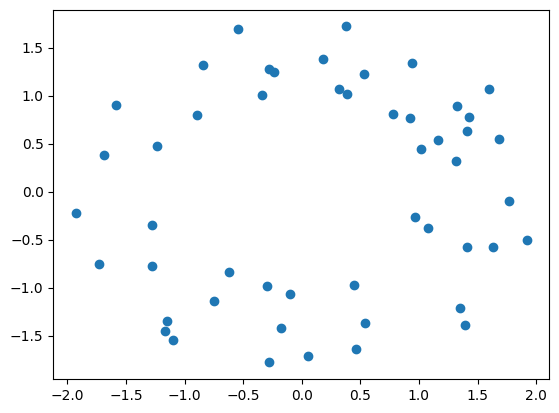

In [5]:
annulus_points = annulus(50,1,2)
plt.scatter(annulus_points[:, 0],annulus_points[:, 1]);

## 3. See the Voronoi diagram and Delaunay triangulation of the annulus points

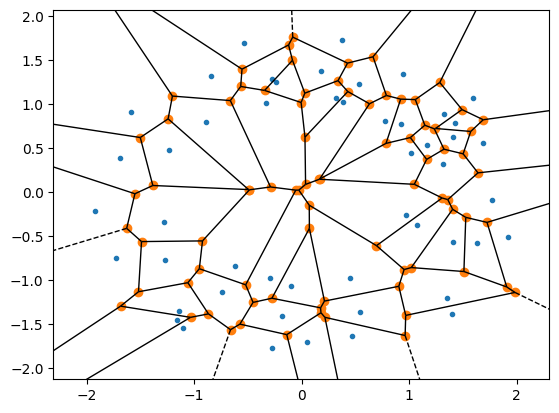

In [6]:
vor = Voronoi(annulus_points)
voronoi_plot_2d(vor);

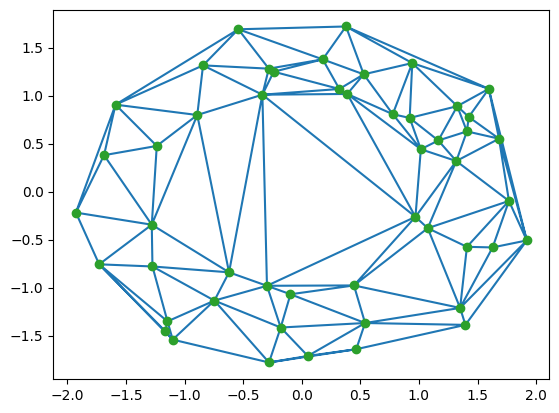

In [7]:
tri = Delaunay(annulus_points)
plt.triplot(annulus_points[:,0], annulus_points[:,1], tri.simplices)
plt.plot(annulus_points[:,0], annulus_points[:,1], 'o')
plt.show();

## 4. Persistence diagram of the annulus points

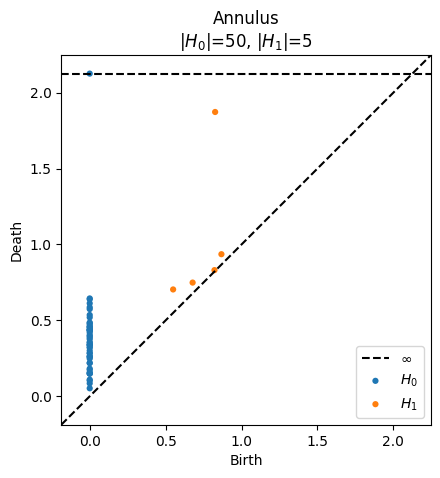

In [8]:
def diagram_sizes(dgms):
    return ", ".join([f"|$H_{i}$|={len(d)}" for i, d in enumerate(dgms)])

annulus_data = ripser.ripser(annulus_points)['dgms']
persim.plot_diagrams(
    annulus_data,
    show=True,
    title=f"Annulus\n{diagram_sizes(annulus_data)}"
)

## 5. Vietoris-Rips complex of the annulus data

In [9]:
# Plot the Vietoris-Rips complex with distance parameter equal to the max_filtration

def VR2D(points, ax_subplot, max_filtration):
    for i in range(points.shape[0]):
        for j in range(points.shape[0]):
            if distance.euclidean(points[i], points[j]) < max_filtration:
                x = np.array([points[i][0], points[j][0]])
                y = np.array([points[i][1], points[j][1]])
                ax_subplot.plot(x,y)
    ax_subplot.set_title("Max filtration:"+str(max_filtration))

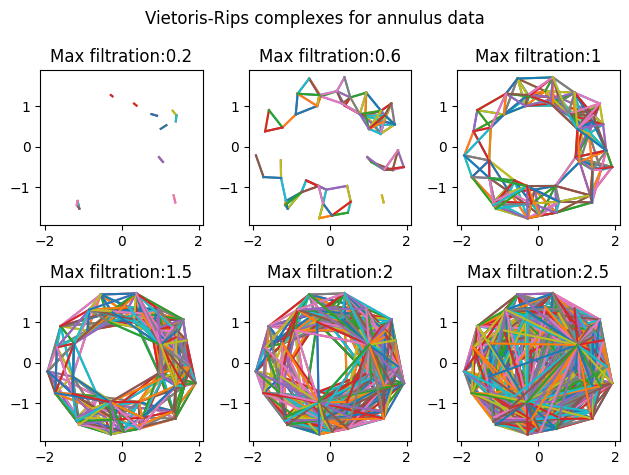

In [10]:
fig, axs = plt.subplots(2, 3)
VR2D(annulus_points, axs[0,0], 0.2)
VR2D(annulus_points, axs[0,1], 0.6)
VR2D(annulus_points, axs[0,2], 1)
VR2D(annulus_points, axs[1,0], 1.5)
VR2D(annulus_points, axs[1,1], 2)
VR2D(annulus_points, axs[1,2], 2.5)
plt.suptitle("Vietoris-Rips complexes for annulus data")
plt.tight_layout()
plt.show()

## 6. Points on a torus

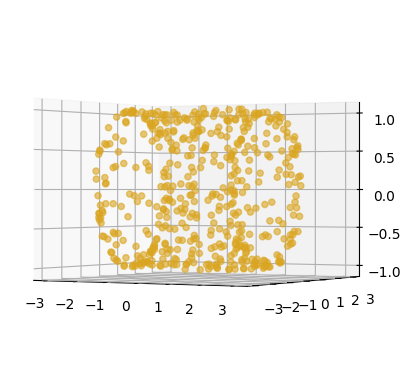

In [11]:
# 500 points of torus shape. See what happens if you take a smaller number of points.
torus_points = tadasets.torus(500, seed=RANDOM_SEED)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(torus_points[:, 0], torus_points[:, 1], torus_points[:, 2], c="goldenrod", alpha=0.6);

def rotate_torus(angle):
    ax.view_init(elev=angle)

rot_animation_torus = animation.FuncAnimation(fig, rotate_torus, frames=np.arange(0,92,2), interval = 1000)
rot_animation_torus.save('rot_torus_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [20]:
# Uncomment the following code if on your PC.
# Video("rot_torus_animation.mp4")

# The following code is for encoding and playing video on Google colab.
mp4 = open('rot_torus_animation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

## 7. Persistence diagram of the torus points

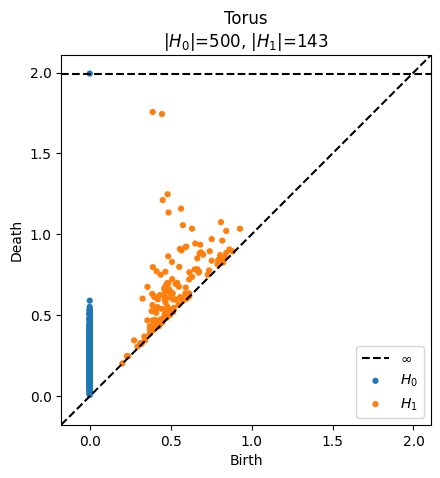

In [13]:
torus_data = ripser.ripser(torus_points)['dgms']
persim.plot_diagrams(
    torus_data,
    show=True,
    title=f"Torus\n{diagram_sizes(torus_data)}"
)

## 8. Vietoris-Rips complex of the torus data

In [14]:
def VR3D(points, ax_subplot, max_filtration):
    for i in range(points.shape[0]):
        for j in range(points.shape[0]):
            if distance.euclidean(points[i], points[j]) < max_filtration:
                x = np.array([points[i][0], points[j][0]])
                y = np.array([points[i][1], points[j][1]])
                z = np.array([points[i][2], points[j][2]])
                ax_subplot.plot(x,y,z)
    ax_subplot.set_title("Vietoris-Rips complexes for torus data. Max filtration:"+str(max_filtration))

def draw_VR3D(filename, max_filtration):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    VR3D(torus_points, ax, max_filtration)
    def rotate(angle):
        ax.view_init(elev=angle)

    rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,92,2),interval=2000)
    rot_animation.save(filename+'.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

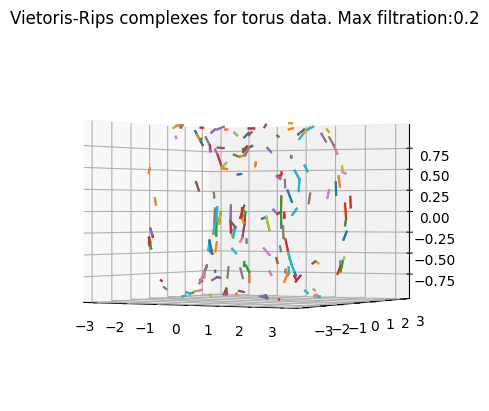

In [15]:
draw_VR3D("VR_torus_animation_low_maxfil", max_filtration=0.2)

In [16]:
# Video("VR_torus_animation_low_maxfil.mp4")

# The following code is for encoding and playing video on Google colab.
mp4 = open('VR_torus_animation_low_maxfil.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

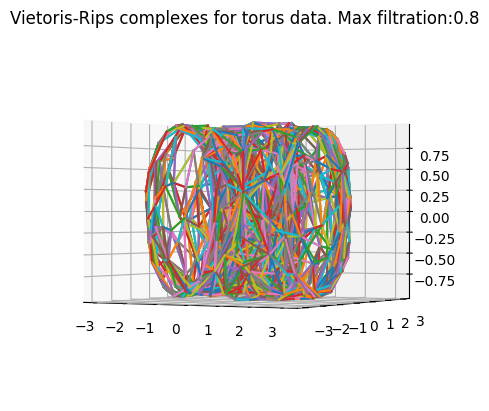

In [17]:
draw_VR3D("VR_torus_animation", max_filtration=0.8)

In [18]:
# Uncomment the following code if on your PC.
# Video("VR_torus_animation.mp4")

# The following code is for encoding and playing video on Google colab.
mp4 = open('VR_torus_animation.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)